# **Space X  Falcon 9 First Stage Landing Prediction**


# NoteBook 5: Machine Learning Predictive Model

This is the final notebook for the `Space X  Falcon 9 First Stage Landing Prediction` project. In this notebook, the Training Labels were determined and different classification models were compared to select the most appropriate predictive model for this project.



## Objectives


Determine Training Labels and build Classification models

- create a column for the class
- Standardize the data
- Split into training data and test data
- Find best Hyperparameter for SVM, Classification Trees, Logistic Regression and KNN
- Find the model that performs best using test data 


----

## Import Libraries

In [199]:
import pandas as pd   # for data manipulation and analysis.
import numpy as np   # for large, multi-dimensional arrays and matrices operations

import matplotlib.pyplot as plt   # plotting library and plotting framework
import seaborn as sns   # data visualization library based on matplotlib

from sklearn import preprocessing   # data standardization
from sklearn.model_selection import train_test_split   # split data into training and testing data
from sklearn.model_selection import GridSearchCV   # hyper-parameter tuning

from sklearn.linear_model import LogisticRegression   # Logistic Regression algorithm
from sklearn.svm import SVC   # Support Vector Machine algorithm
from sklearn.tree import DecisionTreeClassifier   # Decision Tree algorithm
from sklearn.neighbors import KNeighborsClassifier   # K Nearest Neighbors algorithm

Load Space X dataset, `dataset2-after-eda.csv`, the one after EDA


In [200]:
data = pd.read_csv('data/dataset2-after-eda.csv')
data.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Get the Predictors **X** (all features `minus Class`) and the Target variable **Y** `Class`

In [201]:
Y = data["Class"]
X = data.drop(['Class'], axis=1)
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Standardize the data in `X`

In [202]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

Split the data into training and testing data.


In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Classification Models

This function is to plot confusion matrix.

In [204]:
def plot_confusion_matrix(y,y_predict):
    
    '''
    this function plots the confusion matrix
    '''
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

### Logistic Regression

Create a logistic regression object  then create a  GridSearchCV with cv = 10.  Fit the object to find the best parameters from the dictionary `parameters`.


In [205]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
gridsearch_cv_lr = GridSearchCV(lr, parameters, scoring='accuracy' ,cv=10)
logReg_cv = gridsearch_cv_lr.fit(X_train, Y_train)


Output the `GridSearchCV` object for logistic regression. Display the best parameters using the data attribute `best_params_` and the accuracy on the validation data using the data attribute `best_score_`. Also Calculate the accuracy on the test data using the method `score`


In [206]:
print("tuned hpyerparameters :(best parameters) ",logReg_cv.best_params_)
print("accuracy :",logReg_cv.best_score_)

# using the Score Method
lr_score = logReg_cv.score(X_test, Y_test)
print('Logistic Regression accuracy using method score:', lr_score)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714
Logistic Regression accuracy using method score: 0.8333333333333334


Now plot a confusion matrix:

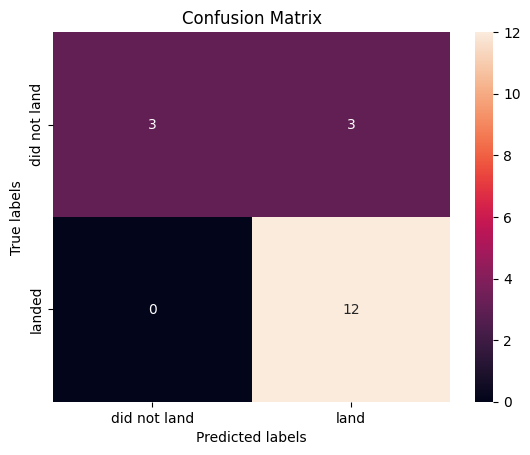

In [207]:
yhat = logReg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, the logistic regression can distinguish between the different classes by producing `15` correct predictions and `3 false positive`.


### Support Vector Machine

Create a SVM object  then create a  GridSearchCV with cv = 10.  Fit the object to find the best parameters from the dictionary `parameters`.


In [208]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
gridsearch_cv_svm = GridSearchCV(svm, parameters, scoring="accuracy", cv=10)
svm_cv = gridsearch_cv_svm.fit(X_train, Y_train)

Output the `GridSearchCV` object for SVM. Display `best_params_`, `best_score_` and also Calculate the accuracy on the test data using the method `score`


In [209]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

svm_cv_score = svm_cv.score(X_test, Y_test)
print('svm accuracy using method score:', svm_cv_score)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858
svm accuracy using method score: 0.8333333333333334


Plot the confusion matrix

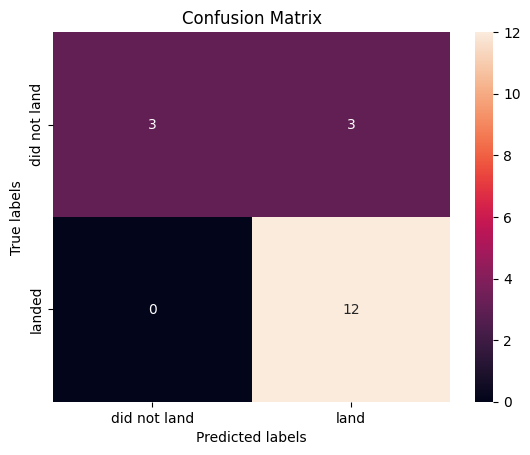

In [210]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, the Model produced `15` correct predictions and `3 false positives`.


### Decision Trees

Create a DecisionTree object then create a  GridSearchCV with cv = 10.  Fit the object to find the best parameters from the dictionary `parameters`.


In [211]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
gridsearch_cv_tree = GridSearchCV(tree, parameters, scoring="accuracy", cv=10)
tree_cv = gridsearch_cv_tree.fit(X_train, Y_train)

Output the `GridSearchCV` object for DecisionTree. Display `best_params_`, `best_score_` and also Calculate the accuracy on the test data using the method `score`


In [212]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tree_cv_score = tree_cv.score(X_test, Y_test)
print('Decision tree accuracy using method score:', tree_cv_score)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8875
Decision tree accuracy using method score: 0.9444444444444444


Plot the confusion matrix

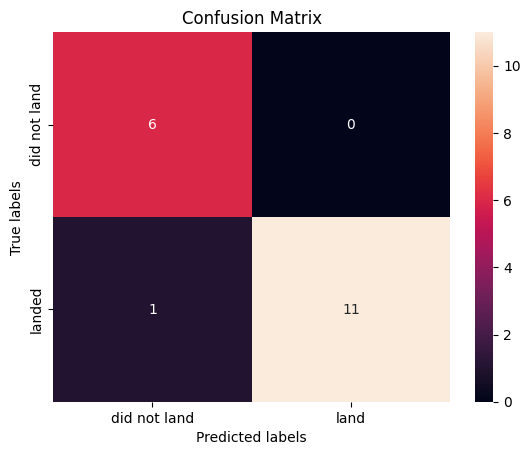

In [213]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The Decision Tree Model produced `17` correct predictions and `1 false negative`.


### K nearest neighbors

Create a KNN object then create a  GridSearchCV with cv = 10.  Fit the object to find the best parameters from the dictionary `parameters`.


In [214]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
gridsearch_cv_knn = GridSearchCV(KNN, parameters, scoring="accuracy", cv=10)
knn_cv = gridsearch_cv_knn.fit(X_train, Y_train)

Output the `GridSearchCV` object for KNN. Display `best_params_`, `best_score_` and also Calculate the accuracy on the test data using the method `score`


In [215]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

knn_cv_score = knn_cv.score(X_test, Y_test)
print('KNN accuracy using method score:', knn_cv_score)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714
KNN accuracy using method score: 0.7777777777777778


Plot the confusion matrix

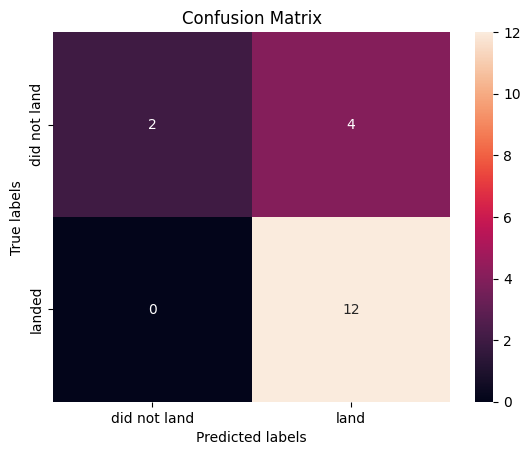

In [216]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The KNN Model produced `16` correct predictions and `4 false positives`.


## Find the model that performed best


Create a dataframe for the algorithms, accuracy score and best Score

In [217]:
algorithms = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'K Nearest Neighbors']
score = [lr_score, svm_cv_score, tree_cv_score, knn_cv_score]
best_score = [logReg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]
columnNames = ['Algorithms', 'Accuracy Score', 'Best Score']

In [218]:
df = pd.DataFrame(list(zip(algorithms, score, best_score)), columns= columnNames)
df

,Algorithms,Accuracy Score,Best Score
0,Logistic Regression,0.833333,0.821429
1,Support Vector Machine,0.833333,0.848214
2,Decision Tree,0.944444,0.887500
3,K Nearest Neighbors,0.777778,0.833929


Use barplot to visualize the `Accuracy Score`.

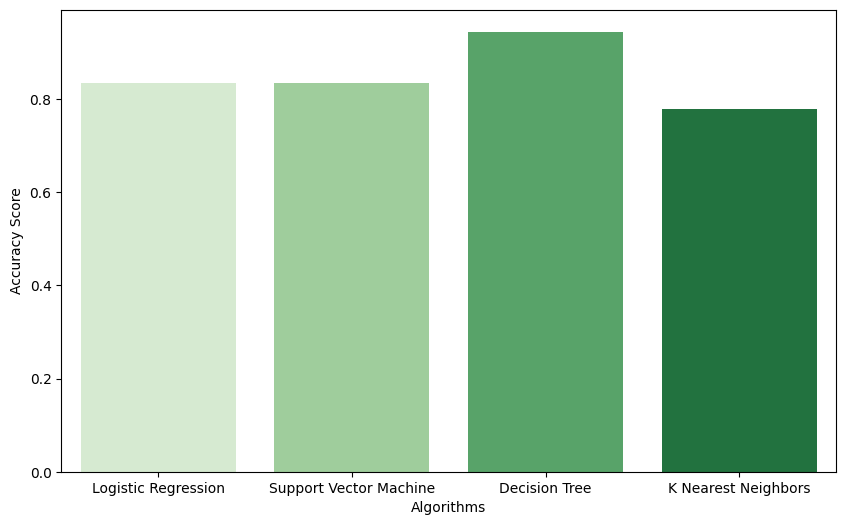

In [219]:
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithms', y='Accuracy Score', data=df, palette='Greens')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

Use barplot to visualize the `Best Score`.

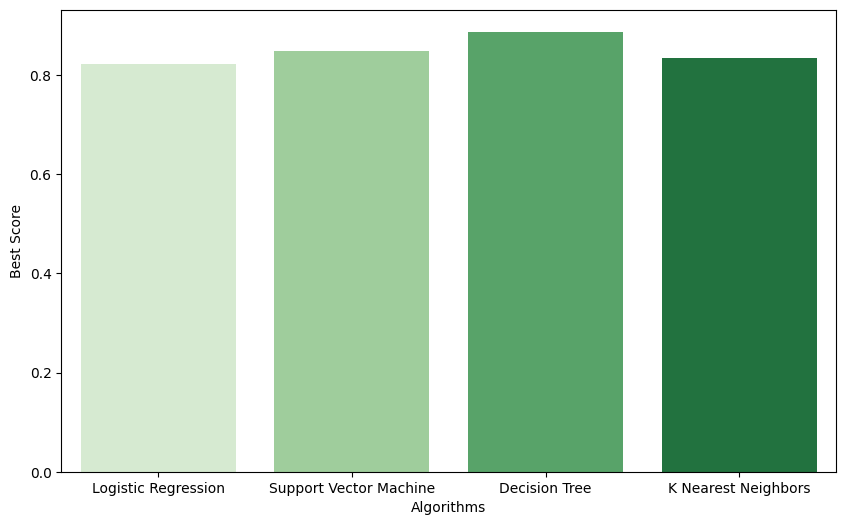

In [220]:
plt.figure(figsize=(10,6))
sns.barplot(x='Algorithms', y='Best Score', data=df, palette='Greens')
plt.xlabel('Algorithms')
plt.ylabel('Best Score')
plt.show()